In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_excel('C:\\Users\\sniks\\OneDrive\\Desktop\\Telecom_churn_rate.xlsx')

In [141]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [142]:
print(df['TotalCharges'].dtype)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

object


In [143]:
missing_data = df.isnull().sum()
print(missing_data)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64


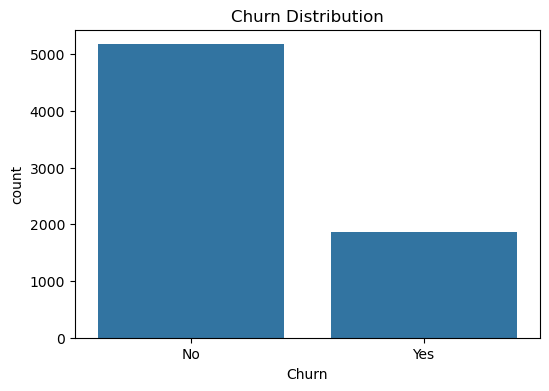

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

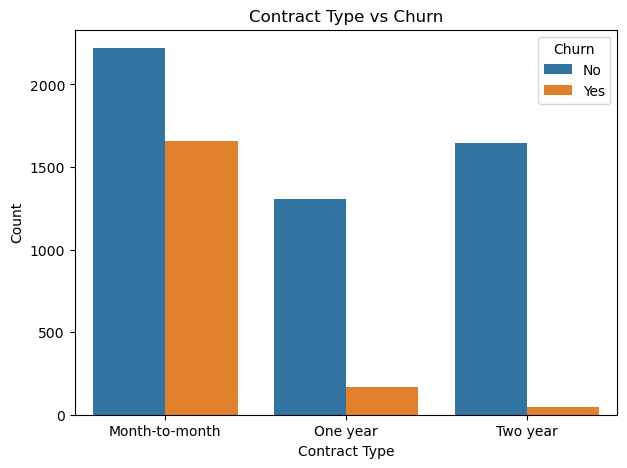

In [146]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

In [169]:
'''Customers with higher MonthlyCharges churn more.
Contract type is a strong predictor and shows higher churn.
Missing values are mostly in TotalCharges.
InternetService and PaymentMethod also show churn patterns.'''

'Customers with higher MonthlyCharges churn more.\nContract type is a strong predictor and shows higher churn.\nMissing values are mostly in TotalCharges.\nInternetService and PaymentMethod also show churn patterns.'

In [147]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

In [148]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [150]:
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn'].map({'Yes': 1, 'No': 0}) 

In [151]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'numAdminTickets',
                                                   'numTechTickets']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGroup'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Logistic Regression Performance:
Accuracy : 0.8339
Precision: 0.6309
Recall   : 0.8981

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.81      0.88      1036
       Churn       0.63      0.90      0.74       373

    accuracy                           0.83      1409
   macro avg       0.79      0.85      0.81      1409
weighted avg       0.87      0.83      0.84      1409



In [153]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name}: F1-weighted = {f1:.3f}")

Logistic Regression: F1-weighted = 0.857
Random Forest: F1-weighted = 0.855
Gradient Boosting: F1-weighted = 0.865


In [154]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__max_depth": [5, 7]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best Cross-Validation F1-weighted: 0.8572096794998391
Test F1-weighted: 0.8669279676283524

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.90      0.92      0.91      1036
       Churn       0.76      0.73      0.74       373

    accuracy                           0.87      1409
   macro avg       0.83      0.82      0.83      1409
weighted avg       0.87      0.87      0.87      1409



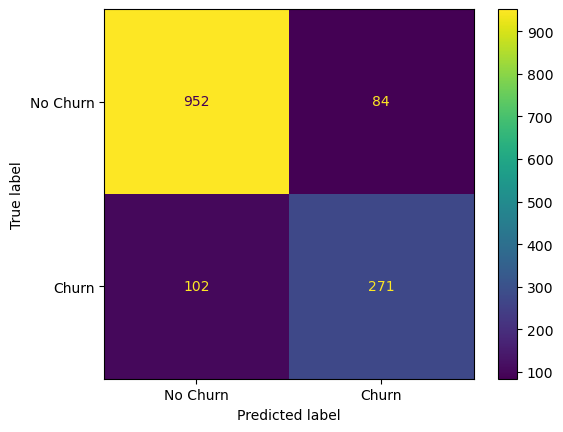

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_search_gb, X_test, y_test, display_labels=["No Churn", "Churn"])
plt.show()


In [166]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

smote_pipeline.fit(X_train, y_train)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_res, y_res = smote_pipeline.named_steps["smote"].fit_resample(X_train_preprocessed, y_train)
print("\n Rows added by SMOTE (for oversampling)")
print("Before SMOTE:", X_train.shape[0], "rows")
print("After SMOTE:", X_res.shape[0], "rows")
print("Rows added:", X_res.shape[0] - X_train.shape[0])

print("\n Without SMOTE")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

y_pred_smote = smote_pipeline.predict(X_test)

print("\n With SMOTE")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

print("F1-weighted with SMOTE:",
      f1_score(y_test, y_pred_smote, average="weighted"))



 Rows added by SMOTE (for oversampling)
Before SMOTE: 5634 rows
After SMOTE: 8276 rows
Rows added: 2642

 Without SMOTE
              precision    recall  f1-score   support

    No Churn       0.90      0.92      0.91      1036
       Churn       0.76      0.73      0.74       373

    accuracy                           0.87      1409
   macro avg       0.83      0.82      0.83      1409
weighted avg       0.87      0.87      0.87      1409

Test F1-weighted: 0.8669279676283524

 With SMOTE
              precision    recall  f1-score   support

    No Churn       0.94      0.86      0.90      1036
       Churn       0.69      0.84      0.76       373

    accuracy                           0.86      1409
   macro avg       0.81      0.85      0.83      1409
weighted avg       0.87      0.86      0.86      1409

F1-weighted with SMOTE: 0.8601325040218719


In [165]:
from sklearn.metrics import roc_auc_score, confusion_matrix
y_pred_final = smote_pipeline.predict(X_test) 
y_proba_final = smote_pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

print("Test Set:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")

Test Set:
Precision : 0.6864
Recall    : 0.8391
F1-Score  : 0.7551
ROC AUC   : 0.9307



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.86      0.90      1036
       Churn       0.69      0.84      0.76       373

    accuracy                           0.86      1409
   macro avg       0.81      0.85      0.83      1409
weighted avg       0.87      0.86      0.86      1409

F1 weighted:  0.8601325040218719


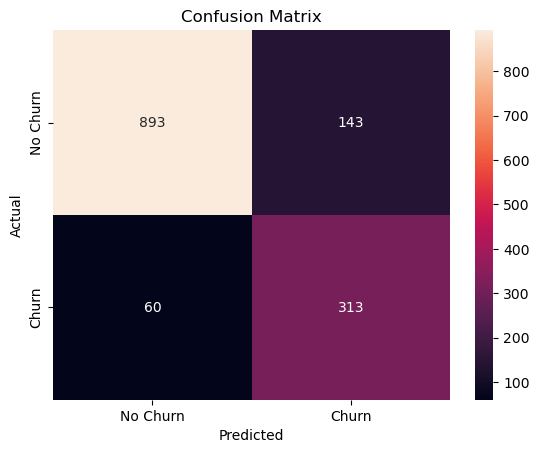

In [175]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=["No Churn", "Churn"]))
print("F1 weighted: ", f1_score(y_test, y_pred_smote, average="weighted"))

cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [177]:
'''From the above confusion matrix, True Negative = 893, False Positive = 143, False Negative = 60, True Positive = 313. 
So according to business cost, False positive means the model predicted that the customer will churn, but actually he didn't.
False Negative means that model predicted that the customer will not churn but he actually churned. Losing a customer can be more expensive than offering small offers or discounts to the loyal customers. '''

"From the above confusion matrix, True Negative = 893, False Positive = 143, False Negative = 60, True Positive = 313. \nSo according to business cost, False positive means the model predicted that the customer will churn, but actually he didn't.\nFalse Negative means that model predicted that the customer will not churn but he actually churned. Losing a customer can be more expensive than offering small offers or discounts to the loyal customers. "

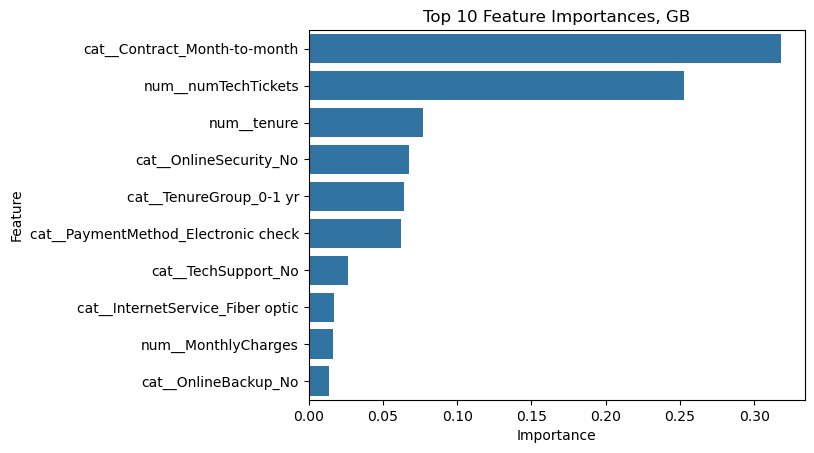

In [163]:
preprocessor = smote_pipeline.named_steps['preprocessor']
gb_model = smote_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
})

top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Feature Importances, GB')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
'''New customers and those on month-to-month plans are more likely to churn—they haven’t built loyalty yet.
Frequent tech issues and poor support drive frustration.
Customers without add-on services (like Tech Support or Online Security) feel less cared for.
'''

'New customers and those on month-to-month plans are more likely to churn—they haven’t built loyalty yet.\n\nFrequent tech issues and poor support drive frustration.\n\nCustomers without add-on services (like Tech Support or Online Security) feel less cared for.\n\n'